In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("Task 2 ML Data.csv")

In [3]:
data = data.drop(['Date'],axis=1)
data = data.drop_duplicates()
print(data.isnull().sum())

NO2           0
CO            0
O3            0
PM2.5         0
SO2           0
 AQI Value    0
WIND          0
TEMP          0
PRESSURE      0
RH            0
dtype: int64


In [4]:
print(data.shape)

(365, 10)


In [5]:
X = data[['NO2','CO','O3','PM2.5','SO2','WIND','TEMP','PRESSURE','RH ']]
Y = data[[' AQI Value']]

In [6]:
X = np.array(X)
Y = np.array(Y)
X_train = X[:300,:]
X_test = X[300:,:]
Y_train = Y[:300,:]
Y_test = Y[300:,:]

In [2]:
#Linear Regression
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train,Y_train)
Y_pred = Lr.predict(X_test)

AttributeError: 'LinearRegression' object has no attribute 'fitt'

In [8]:
print(np.concatenate((Y_pred,Y_test),axis=1))

[[47.5579638  44.        ]
 [80.1226952  64.        ]
 [88.82481105 90.        ]
 [64.70941157 55.        ]
 [29.18438874 34.        ]
 [37.20533041 45.        ]
 [28.40056665 33.        ]
 [40.59809209 37.        ]
 [42.13816005 42.        ]
 [71.84685847 62.        ]
 [91.66403402 74.        ]
 [75.24811125 63.        ]
 [57.4213271  49.        ]
 [34.44742884 36.        ]
 [54.43085831 44.        ]
 [50.91203177 41.        ]
 [18.27443332 25.        ]
 [20.08454787 30.        ]
 [46.03465107 61.        ]
 [45.21648374 51.        ]
 [50.89248413 44.        ]
 [33.69645587 38.        ]
 [66.49016088 58.        ]
 [68.13164399 57.        ]
 [45.22192523 38.        ]
 [37.88584075 45.        ]
 [29.38967392 40.        ]
 [30.58668576 36.        ]
 [27.52631484 33.        ]
 [34.53350283 36.        ]
 [73.07077604 61.        ]
 [55.38960649 55.        ]
 [41.87615935 44.        ]
 [35.06027358 37.        ]
 [54.26599633 58.        ]
 [57.84413122 58.        ]
 [50.65211062 50.        ]
 

In [9]:
#Correlation Co-efficient
Pred_mean = Y_pred.mean()
test_mean = Y_test.mean()
num = 0
den_1 = 0
den_2 = 0
for i in range(0,65):
    num = num+(Y_pred[i][0] - Pred_mean)*(Y_test[i][0] - test_mean)
    den_1 = den_1+(Y_pred[i][0] - Pred_mean)**2
    den_2 = den_2+(Y_test[i][0] - test_mean)**2
corr = num/((den_1*den_2)**0.5)
print("Correlation Co-efficient is: ",corr)

Correlation Co-efficient is:  0.719631313073567


In [10]:
#Mean Squared Error
MSE = 0
for i in range(0,65):
    MSE = MSE+(Y_pred[i][0] - Y_test[i][0])**2
MSE = MSE/65
print("Mean Squared Error is: ",MSE)

Mean Squared Error is:  131.35612334456553


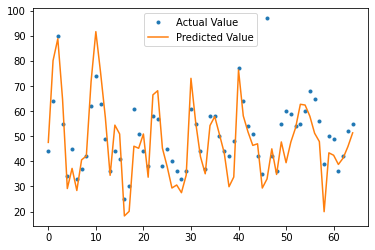

In [11]:
#Regression Plot
plt.plot(Y_test,'.',label="Actual Value")
plt.plot(Y_pred,label="Predicted Value")
plt.legend()

In [12]:
co_eff = Lr.coef_
print("Co-efficients B1,B2...,B9 : \n")
for i in co_eff[0]:
    print(i)
print("\nIntercept (B0) :",Lr.intercept_[0])

Co-efficients B1,B2...,B9 : 

0.21740239562679659
-8.409736748223652
1144.0384292101894
2.3979179820619407
-0.07134946008763832
-0.7613819233200595
0.022132830037511653
-0.07998044975000518
0.03138118673924506

Intercept (B0) : 56.67540308122456


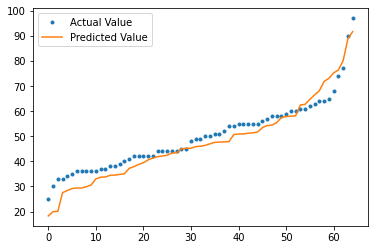

In [13]:
plt.plot(np.sort(Y_test.reshape(1,65)).reshape(65,1),'.',label="Actual Value")
plt.plot(np.sort(Y_pred.reshape(1,65)).reshape(65,1),label="Predicted Value")
plt.legend()